# 敵対的サンプルについての調査


# 準備

In [22]:
import pandas as pd
import numpy as np
import os
import torch
import torch.nn as nn
from pandas.tests.test_window import Dtype_integer

In [3]:
df_orig = pd.read_csv('data/df_orig.csv')
df_orig.head()

,Unnamed: 0,checking_status,duration,credit_amount,savings_status,employment,installment_commitment,residence_since,age,existing_credits,num_dependents,own_telephone,foreign_worker,target
0,0,0.0,6.0,1169.0,4.0,4.0,4.0,4.0,67.0,2.0,1.0,1.0,0.0,1.0
1,1,1.0,48.0,5951.0,0.0,2.0,2.0,2.0,22.0,1.0,1.0,0.0,0.0,0.0
2,2,3.0,12.0,2096.0,0.0,3.0,2.0,3.0,49.0,1.0,2.0,0.0,0.0,1.0
3,3,0.0,42.0,7882.0,0.0,3.0,2.0,4.0,45.0,1.0,2.0,0.0,0.0,1.0
4,4,0.0,24.0,4870.0,0.0,2.0,3.0,4.0,53.0,2.0,2.0,0.0,0.0,0.0


In [4]:
# データフレームについて
print(df_orig.shape)
print(df_orig.columns)
print(df_orig.dtypes)

(1000, 14)
Index(['Unnamed: 0', 'checking_status', 'duration', 'credit_amount',
       'savings_status', 'employment', 'installment_commitment',
       'residence_since', 'age', 'existing_credits', 'num_dependents',
       'own_telephone', 'foreign_worker', 'target'],
      dtype='object')
Unnamed: 0                  int64
checking_status           float64
duration                  float64
credit_amount             float64
savings_status            float64
employment                float64
installment_commitment    float64
residence_since           float64
age                       float64
existing_credits          float64
num_dependents            float64
own_telephone             float64
foreign_worker            float64
target                    float64
dtype: object


In [15]:
df_lowprofool = pd.read_csv("data/lowprofool.csv")
df_lowprofool.head(10)

,Unnamed: 0,checking_status,duration,credit_amount,savings_status,employment,installment_commitment,residence_since,age,existing_credits,num_dependents,own_telephone,foreign_worker,orig_pred,adv_pred,iters
0,685,0.999051,0.827235,0.345710,0.991999,0.484727,1.000000,1.000000,0.267396,0.172199,1.000000,0.905465,0.000000,1.0,0.0,3.0
1,727,0.010210,0.202988,0.131943,0.000000,0.488379,1.000000,1.000000,0.116826,0.324960,0.006982,0.019455,0.040458,0.0,1.0,1.0
2,30,0.313497,0.420171,0.124479,0.730512,0.269089,0.559959,0.683211,0.242985,0.000000,0.000000,0.953922,0.000000,1.0,0.0,19.0
3,376,0.999613,0.207476,0.111432,0.003214,0.000000,0.348372,0.639113,0.258874,0.334136,0.242178,0.050512,0.000000,1.0,0.0,2.0
4,66,1.000000,0.118504,0.105204,0.000000,0.249112,0.331360,0.370214,0.170298,0.000000,0.217297,0.006152,0.000000,1.0,0.0,0.0
5,965,0.332792,0.384395,0.076192,1.000000,0.498147,1.000000,0.124855,0.129341,0.019181,0.000000,0.000000,0.000000,1.0,0.0,0.0
6,963,0.998017,0.299535,0.170431,0.487761,1.000000,0.607740,0.336544,0.179028,0.529075,0.000000,1.000000,0.000000,1.0,0.0,6.0
7,61,0.325234,0.202289,0.014407,1.000000,1.000000,0.927451,0.661771,0.635278,0.058030,0.000000,0.689067,0.000000,1.0,0.0,15.0
8,282,0.663259,0.222857,0.052387,1.000000,0.749052,1.000000,0.760077,0.567465,0.000000,0.000000,0.000000,0.000000,1.0,0.0,1.0
9,268,0.000575,0.141193,0.482416,0.000000,0.987223,0.030507,1.000000,0.474682,0.122735,0.097621,1.000000,1.000000,0.0,1.0,1.0


In [6]:
# データフレームについて
print(df_lowprofool.shape)
print(df_lowprofool.columns)
print(df_lowprofool.dtypes)

(10, 16)
Index(['Unnamed: 0', 'checking_status', 'duration', 'credit_amount',
       'savings_status', 'employment', 'installment_commitment',
       'residence_since', 'age', 'existing_credits', 'num_dependents',
       'own_telephone', 'foreign_worker', 'orig_pred', 'adv_pred', 'iters'],
      dtype='object')
Unnamed: 0                  int64
checking_status           float64
duration                  float64
credit_amount             float64
savings_status            float64
employment                float64
installment_commitment    float64
residence_since           float64
age                       float64
existing_credits          float64
num_dependents            float64
own_telephone             float64
foreign_worker            float64
orig_pred                 float64
adv_pred                  float64
iters                     float64
dtype: object


In [12]:
df_deepfool = pd.read_csv("data/deepfool.csv")
df_deepfool.head(10)

,Unnamed: 0,checking_status,duration,credit_amount,savings_status,employment,installment_commitment,residence_since,age,existing_credits,num_dependents,own_telephone,foreign_worker,orig_pred,adv_pred,iters
0,685,0.981933,0.863431,0.349477,0.978768,0.465368,1.000000,1.000000,0.274676,0.056463,1.000000,0.954997,0.000728,1.0,0.0,100.0
1,727,0.009512,0.204720,0.115211,0.000000,0.493425,1.000000,1.000000,0.113813,0.328542,0.003927,0.011106,0.023437,0.0,1.0,41.0
2,30,0.305321,0.411951,0.125985,0.731543,0.266608,0.579347,0.686392,0.247791,0.000000,0.000000,0.964107,0.000000,1.0,0.0,251.0
3,376,0.986398,0.234232,0.107974,0.008260,0.000000,0.353688,0.671887,0.233224,0.325316,0.032148,0.024097,0.000000,1.0,0.0,82.0
4,66,0.997488,0.120710,0.105763,0.000000,0.247125,0.329360,0.336620,0.157009,0.001064,0.014736,0.001461,0.000000,1.0,0.0,31.0
5,965,0.322268,0.389915,0.064044,0.997190,0.492721,1.000000,0.014108,0.129211,0.007540,0.000000,0.000000,0.000000,1.0,0.0,30.0
6,963,0.982538,0.323035,0.189087,0.477801,0.982293,0.640486,0.335463,0.241231,0.383487,0.000000,1.000000,0.000000,1.0,0.0,144.0
7,61,0.293024,0.321518,0.000000,1.000000,1.000000,0.957876,0.988091,0.634149,0.302371,0.019960,0.955249,0.000000,1.0,0.0,260.0
8,282,0.643596,0.245737,0.050300,1.000000,0.750172,1.000000,0.980150,0.564997,0.000000,0.000000,0.000000,0.000000,1.0,0.0,62.0
9,268,0.016539,0.111852,0.488359,0.000000,0.979669,0.029135,1.000000,0.470974,0.029925,0.014135,1.000000,0.995062,0.0,1.0,66.0


In [8]:
# データフレームについて
print(df_deepfool.shape)
print(df_deepfool.columns)
print(df_deepfool.dtypes)

(10, 16)
Index(['Unnamed: 0', 'checking_status', 'duration', 'credit_amount',
       'savings_status', 'employment', 'installment_commitment',
       'residence_since', 'age', 'existing_credits', 'num_dependents',
       'own_telephone', 'foreign_worker', 'orig_pred', 'adv_pred', 'iters'],
      dtype='object')
Unnamed: 0                  int64
checking_status           float64
duration                  float64
credit_amount             float64
savings_status            float64
employment                float64
installment_commitment    float64
residence_since           float64
age                       float64
existing_credits          float64
num_dependents            float64
own_telephone             float64
foreign_worker            float64
orig_pred                 float64
adv_pred                  float64
iters                     float64
dtype: object


In [9]:
print(df_orig.columns)
print(df_lowprofool.columns)

Index(['Unnamed: 0', 'checking_status', 'duration', 'credit_amount',
       'savings_status', 'employment', 'installment_commitment',
       'residence_since', 'age', 'existing_credits', 'num_dependents',
       'own_telephone', 'foreign_worker', 'target'],
      dtype='object')
Index(['Unnamed: 0', 'checking_status', 'duration', 'credit_amount',
       'savings_status', 'employment', 'installment_commitment',
       'residence_since', 'age', 'existing_credits', 'num_dependents',
       'own_telephone', 'foreign_worker', 'orig_pred', 'adv_pred', 'iters'],
      dtype='object')


In [35]:
df = pd.read_csv("data/df.csv")
# df = df[]
df.head()
df.shape

(600, 14)

## IDで各モデルの出力結果を比較する

df_compareのmodel_idについて
- 0: df_orig
- 1: df_lowprofool
- 2: df_deepfool

In [16]:
# model_idの作成
df_orig['model_id'] = 0
df_orig.rename(columns={'target': 'orig_pred'}, inplace=True)
df_orig['adv_pred'] = df_orig['orig_pred']
df_orig['iters'] = 0
df_lowprofool['model_id'] = 1
df_deepfool['model_id'] = 2

df_mix = pd.concat([df_orig, df_lowprofool, df_deepfool], sort=True, ignore_index=True)
df_mix

,Unnamed: 0,adv_pred,age,checking_status,credit_amount,duration,employment,existing_credits,foreign_worker,installment_commitment,iters,model_id,num_dependents,orig_pred,own_telephone,residence_since,savings_status
0,0,1.0,67.000000,0.000000,1169.000000,6.000000,4.000000,2.000000,0.000000,4.000000,0.0,0,1.000000,1.0,1.000000,4.000000,4.000000
1,1,0.0,22.000000,1.000000,5951.000000,48.000000,2.000000,1.000000,0.000000,2.000000,0.0,0,1.000000,0.0,0.000000,2.000000,0.000000
2,2,1.0,49.000000,3.000000,2096.000000,12.000000,3.000000,1.000000,0.000000,2.000000,0.0,0,2.000000,1.0,0.000000,3.000000,0.000000
3,3,1.0,45.000000,0.000000,7882.000000,42.000000,3.000000,1.000000,0.000000,2.000000,0.0,0,2.000000,1.0,0.000000,4.000000,0.000000
4,4,0.0,53.000000,0.000000,4870.000000,24.000000,2.000000,2.000000,0.000000,3.000000,0.0,0,2.000000,0.0,0.000000,4.000000,0.000000
5,5,1.0,35.000000,3.000000,9055.000000,36.000000,2.000000,1.000000,0.000000,2.000000,0.0,0,2.000000,1.0,1.000000,4.000000,4.000000
6,6,1.0,53.000000,3.000000,2835.000000,24.000000,4.000000,1.000000,0.000000,3.000000,0.0,0,1.000000,1.0,0.000000,4.000000,2.000000
7,7,1.0,35.000000,1.000000,6948.000000,36.000000,2.000000,1.000000,0.000000,2.000000,0.0,0,1.000000,1.0,1.000000,2.000000,0.000000
8,8,1.0,61.000000,3.000000,3059.000000,12.000000,3.000000,1.000000,0.000000,2.000000,0.0,0,1.000000,1.0,0.000000,4.000000,3.000000
9,9,0.0,28.000000,1.000000,5234.000000,30.000000,0.000000,2.000000,0.000000,4.000000,0.0,0,1.000000,0.0,0.000000,2.000000,0.000000


# 敵対的サンプルの特徴量の分布

In [17]:
df_30 = df_mix[df_mix['Unnamed: 0'] == 30]
df_30

,Unnamed: 0,adv_pred,age,checking_status,credit_amount,duration,employment,existing_credits,foreign_worker,installment_commitment,iters,model_id,num_dependents,orig_pred,own_telephone,residence_since,savings_status
30,30,1.0,36.000000,1.000000,1913.000000,18.000000,1.000000,1.0,0.0,3.000000,0.0,0,1.0,1.0,1.000000,3.000000,3.000000
1002,30,0.0,0.242985,0.313497,0.124479,0.420171,0.269089,0.0,0.0,0.559959,19.0,1,0.0,1.0,0.953922,0.683211,0.730512
1012,30,0.0,0.247791,0.305321,0.125985,0.411951,0.266608,0.0,0.0,0.579347,251.0,2,0.0,1.0,0.964107,0.686392,0.731543


In [23]:
class GermanNet(nn.Module):
    def __init__(self, D_in, H, D_out):
        super(GermanNet, self).__init__()
        self.linear1 = torch.nn.Linear(D_in, H)
        self.linear2 = torch.nn.Linear(H, H)
        self.linear3 = torch.nn.Linear(H, D_out)
        self.relu = torch.nn.ReLU()
        self.softmax = torch.nn.Softmax(dim=0)

    def forward(self, x):
        h1 = self.relu(self.linear1(x))
        h2 = self.relu(self.linear2(h1))
        h3 = self.relu(self.linear2(h2))
        h4 = self.relu(self.linear2(h3))
        h5 = self.relu(self.linear2(h4))
        h6 = self.relu(self.linear2(h5))
        a3 = self.linear3(h6)
        y = self.softmax(a3)
        return y

In [20]:
model_path = 'model_data/model.pth'

D_in = 12
H = 100
D_out = 2

model = GermanNet(D_in, H, D_out)

if os.path.exists(model_path):
    model.load_state_dict(torch.load(model_path))
    model.eval()
else:
    print("Model file not found.")



exits


# 既存のコードを一部変更

In [2]:
from tqdm import tqdm
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import torch.nn as nn
from torch.autograd import Variable
import keras
from Adverse import lowProFool, deepfool
from Metrics import *

Using TensorFlow backend.


In [6]:
from research import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


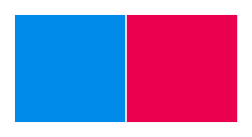

In [7]:
# Retina display
%config InlineBackend.figure_format ='retina'
pd.set_option('display.max_columns', 500)
tqdm.pandas()
np.set_printoptions(suppress=True)

%load_ext autoreload
%autoreload 2

ccolors = ["#008ae9", "#ea004f"]
sns.set_palette(ccolors)
sns.palplot(sns.color_palette())

SEED = 0
DATASET = 'credit-g'

In [8]:
# i. データの読み込み
# Load initial dataset
df_orig, target, feature_names = get_df(DATASET)

# ii. バランス
# Balance dataset classes
df = balance_df(df_orig.copy(), target, SEED)

# 2. 関数の呼び出し
bounds = get_bounds(df_orig)

SyntaxError: invalid syntax (<ipython-input-42-10b3e0e465e2>, line 3)